In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, LSTM, Dropout, Dense, Layer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Check if GPU is available
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Verify access to the EEG_Project folder
!ls "/content/drive/My Drive/EEG_Project"

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Mounted at /content/drive
GAMEEMO  S01G1AllChannels.csv


In [ ]:

# 1. Data Loading and Preprocessing


def create_windows(df, window_size=100, step_size=50):
    """
    Splits the dataframe into overlapping windows.
    - window_size: number of time steps per window.
    - step_size: sliding window step (defines overlap).
    """
    windows = []
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df.iloc[i:i + window_size].values
        windows.append(window)
    return np.array(windows)

# Map game number to emotion label
game_emotions = {
    1: 'calm',      # Game 1
    2: 'boring',    # Game 2
    3: 'funny',     # Game 3
    4: 'horror'     # Game 4
}

all_data = []
all_labels = []
base_path = "/content/drive/MyDrive/EEG_Project"

# Load data for 28 subjects and 4 games per subject
for subject in range(1, 29):  # 28 subjects
    subject_str = f"{subject:02d}"
    for game in range(1, 5):  # 4 games
        path = f"/content/drive/My Drive/EEG_Project/GAMEEMO/(S{subject_str})/Preprocessed EEG Data/.csv format/S{subject_str}G{game}AllChannels.csv"
        try:
            game_data = pd.read_csv(path)
            if 'Unnamed: 14' in game_data.columns:
                game_data = game_data.drop(columns=['Unnamed: 14'])
            # Optionally, you can add band-pass filtering here.
            game_data = game_data.fillna(method='ffill')

            windows = create_windows(game_data, window_size=100, step_size=50)
            labels = [game_emotions[game]] * len(windows)

            all_data.append(windows)
            all_labels.extend(labels)
            print(f"Loaded game {game} for subject {subject_str}")
        except FileNotFoundError:
            print(f"Missing file for game {game}, subject {subject_str}")

# Combine all windows and map string labels to numeric values
X = np.vstack(all_data)
y = np.array(all_labels)
label_map = {'calm': 0, 'boring': 1, 'funny': 2, 'horror': 3}
y_numeric = np.array([label_map[label] for label in y])

# Split data (80/20 train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 01


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 01


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 01


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 01


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 02


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 02


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 02


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 02


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 03


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 03


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 03


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 03


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 04


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 04


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 04


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 04


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 05


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 05


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 05


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 05


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 06


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 06


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 06


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 06


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 07


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 07


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 07


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 07


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 08


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 08


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 08


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 08


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 09


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 09


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 09


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 09


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 10


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 10


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 10


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 10


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 11


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 11


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 11


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 11


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 12


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 12


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 12


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 12


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 13


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 13


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 13


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 13


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 14


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 14


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 14


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 14


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 15


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 15


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 15


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 15


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 16


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 16


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 16


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 16


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 17


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 17


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 17


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 17


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 18


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 18


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 18


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 18


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 19


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 19


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 19


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 19


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 20


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 20


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 20


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 20


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 21


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 21


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 21


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 21


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 22


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 22


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 22


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 22


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 23


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 23


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 23


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 23


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 24


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 24


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 24


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 24


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 25


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 25


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 25


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 25
Missing file for game 1, subject 26
Missing file for game 2, subject 26
Missing file for game 3, subject 26
Missing file for game 4, subject 26


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 27


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 27


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 27


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 27


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 1 for subject 28


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 2 for subject 28


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 3 for subject 28


<ipython-input-2-e130995ab707>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Loaded game 4 for subject 28


In [ ]:


# 2. Define a Custom Attention Layer


class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        # input_shape: (batch_size, time_steps, features)
        self.W = self.add_weight(name='att_weight',
                                 shape=(input_shape[-1], input_shape[-1]),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(name='att_bias',
                                 shape=(input_shape[-1],),
                                 initializer='zeros',
                                 trainable=True)
        self.u = self.add_weight(name='att_u',
                                 shape=(input_shape[-1],),
                                 initializer='glorot_uniform',
                                 trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, inputs):
        # Compute a hidden representation for each time step
        u_it = tf.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        att = tf.tensordot(u_it, self.u, axes=1)
        att = tf.nn.softmax(att, axis=1)
        att = tf.expand_dims(att, axis=-1)
        output = tf.reduce_sum(inputs * att, axis=1)
        return output

In [ ]:
# 3. Define the Refined CNN-LSTM-Attention Model


def create_refined_model(input_shape):
    inputs = Input(shape=input_shape)

    # Convolutional Block
    x = Conv1D(filters=64, kernel_size=5, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    # LSTM Block
    x = LSTM(128, return_sequences=True)(x)
    x = Dropout(0.25)(x)
    x = LSTM(128, return_sequences=True)(x)
    x = Dropout(0.25)(x)

    # Attention Mechanism
    x = Attention()(x)

    # Dense Layers for Classification
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.25)(x)
    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# 4. Model Training


print("\nTraining the Refined EEG Emotion Recognition Model...")
refined_model = create_refined_model((X_train.shape[1], X_train.shape[2]))
history = refined_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]
)

# Evaluate on the test set
test_loss, test_accuracy = refined_model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}")



Training the Refined EEG Emotion Recognition Model...
Epoch 1/50
1651/1651 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.4516 - loss: 1.1535 - val_accuracy: 0.6254 - val_loss: 0.8464 - learning_rate: 0.0010
Epoch 2/50
1651/1651 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.6443 - loss: 0.8214 - val_accuracy: 0.6969 - val_loss: 0.7103 - learning_rate: 0.0010
Epoch 3/50
1651/1651 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.7206 - loss: 0.6726 - val_accuracy: 0.7564 - val_loss: 0.5891 - learning_rate: 0.0010
Epoch 4/50
1651/1651 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7687 - loss: 0.5681 - val_accuracy: 0.7862 - val_loss: 0.5233 - learning_rate: 0.0010
Epoch 5/50
1651/1651 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8053 - loss: 0.4884 - val_accuracy: 0.8069 - val_loss: 0.4756 - learning_rate: 0.0010
Epoch 6/50
1651/1651 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8312 - loss: 0.4312 - val_accuracy: 0.8069 - val_loss: 0.4812 - learning_rate: 0.0010
Epoch 7/5

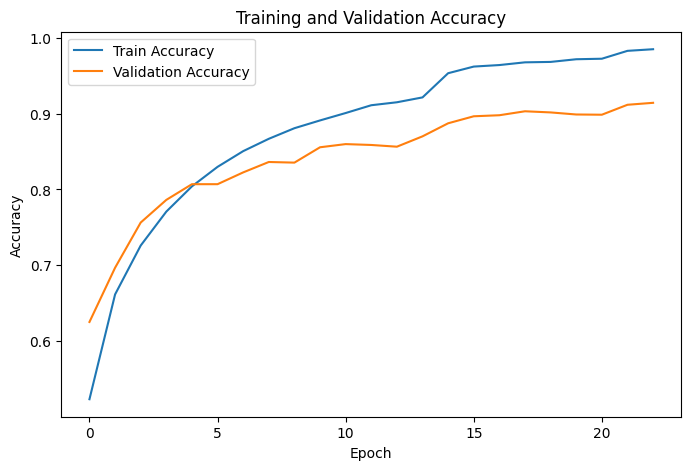

In [ ]:

# 5. (Optional) Plot Training History


plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
